<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/Lab11_Lagarde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 11 SNA Continued
## CSC 401 Lab
## Alex Lagarde
### 3/24/21

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cwiW8N13ueTSDfjkJQ9BIK1Nvev3M4e4')

In [ ]:
nodes = df['orgname']
edges = []
for index, row in df.iterrows():
  curr_school = row['orgname']
  peers = row['selected_peers_concat'].split('|')
  for peer in peers:
    edges.append((curr_school, peer))

Abilene Christian University
Abraham Baldwin Agricultural College
Adams State College
Adelphi University
Adirondack Community College
Agnes Scott College
Aiken Technical College
Alabama A & M University
Alabama State University
Alamance Community College
Alaska Pacific University
Albion College
Albright College
Alexandria Technical & Community College
Allan Hancock College
Allegheny College
Allen County Community College
Alliant International University
Alpena Community College
Alvernia University
Alvin Community College
Amarillo College
American Academy of Dramatic Arts-Los Angeles
American International College
American University
Anamarc College
Ancilla College
Anderson University
Angelina College
Angelo State University
Anna Maria College
Anne Arundel Community College
Anthem Career College-Memphis
Anthem Career College-Nashville
Anthem College-Brookfield
Anthem College-Denver
Anthem College-Maryland Heights
Anthem College-Orlando
Anthem College-Phoenix
Antioch University Seattle
A

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 3320
Number of edges: 37850
Average in degree:  11.4006
Average out degree:  11.4006


In [ ]:
print('Networkx Density:', nx.density(G))
print('Manual Density Calculation', G.number_of_edges() / ((G.number_of_nodes()) * (G.number_of_nodes() - 1)))

Networkx Density: 0.0034349510122442164
Manual Density Calculation 0.0034349510122442164


The density is low as it is almost 0 as density is calculated from 0 to 1. Since density is defined the the number of actual edges over possible edges, a density closer to 1 would be that all these institutions are peers of each other. However, this density shows that most schools have about 10-20 institutional peers out of many many possible schools. Therefore, the idea that density is almost 0 makes a lot of sense logically. 

In [ ]:
in_degree_dict = dict(G.in_degree(G.nodes()))
nx.set_node_attributes(G, in_degree_dict, 'in_degree')

out_degree_dict = dict(G.out_degree(G.nodes()))
nx.set_node_attributes(G, out_degree_dict, 'out_degree')

betweenness_dict = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

eigenvector_dict = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
print('Elon University:', G.nodes['Elon University'])
print('Davidson College:', G.nodes['Davidson College'])
print('University of North Carolina at Chapel Hill', G.nodes['University of North Carolina at Chapel Hill'])

Elon University: {'in_degree': 55, 'out_degree': 11, 'betweenness': 0.0004957983905059715, 'eigenvector': 0.0050464177231364675}
Davidson College: {'in_degree': 56, 'out_degree': 18, 'betweenness': 0.0002827148636964051, 'eigenvector': 0.13869178801231682}
University of North Carolina at Chapel Hill {'in_degree': 44, 'out_degree': 15, 'betweenness': 0.00010761812564490248, 'eigenvector': 0.0692018773678374}


Elon University, Davidson College, and University of North Carolina at Chapel Hill are all institutions with pretty high regards; therefore, they tend to have more in degrees than out degrees as you get closer to the top because there could be less of a need to find peer institutions. All these have low betweenness centralities because they must not bring together different institutions or must not be influential on connecting different schools to each other. Finally, Davidson and UNC Chapel Hill must have higher eigenvector values because they are more connected with other highly regarded insitutions than Elon.  

In [ ]:
sorted_in_degree = sorted(in_degree_dict.items(), key = itemgetter(1), reverse=True)
print('In Degree Centrality Top 10 Rankings')
for i in sorted_in_degree[:10]:
  print(i)

In Degree Centrality Top 10 Rankings
('Capella University', 77)
('Wheaton College', 72)
('Grand Canyon University', 68)
('Ashford University', 67)
('Daniel Webster College', 64)
('Strayer University-District of Columbia', 63)
('Carleton College', 62)
('DeVry University-Florida', 62)
('DeVry University-Illinois', 62)
('American InterContinental University-Online', 62)


In [ ]:
sorted_out_degree = sorted(out_degree_dict.items(), key = itemgetter(1), reverse=True)
print('Out Degree Centrality Top 10 Rankings')
for i in sorted_out_degree[:10]:
  print(i)

Out Degree Centrality Top 10 Rankings
('Iowa State University', 100)
('Indiana Wesleyan University', 99)
('Lander University', 99)
('Rio Salado College', 99)
('The University of Tampa', 99)
('Bainbridge College', 98)
('Bowdoin College', 98)
('Central Wyoming College', 98)
('Guam Community College', 98)
('Trevecca Nazarene University', 98)


In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key = itemgetter(1), reverse=True)
print('Betweenness Centrality Top 10 Rankings')
for i in sorted_betweenness[:10]:
  print(i)

Betweenness Centrality Top 10 Rankings
('Southwestern College', 0.031709805987854056)
('Community College of Philadelphia', 0.02730428922721903)
('Fort Valley State University', 0.020882889965158608)
('Bethany College', 0.019285183175669456)
('Rutgers University-New Brunswick', 0.017111769769329117)
('University of Phoenix-Online Campus', 0.016901286214034188)
('Arkansas State University-Main Campus', 0.01470020739706749)
('South Texas College', 0.014478176486836275)
('Union College', 0.014281109144553127)
('Abilene Christian University', 0.014032327564783939)


In [ ]:
sorted_eigenvector = sorted(eigenvector_dict.items(), key = itemgetter(1), reverse=True)
print('Eigenvector Centrality Top 10 Rankings')
for i in sorted_eigenvector[:10]:
  print(i)

Eigenvector Centrality Top 10 Rankings
('Carleton College', 0.2238194712820259)
('Oberlin College', 0.20993833745194534)
('Williams College', 0.20854439091370378)
('Bowdoin College', 0.2026946269573389)
('Amherst College', 0.19843583387702346)
('Middlebury College', 0.19584429276801366)
('Swarthmore College', 0.18788361090162994)
('Pomona College', 0.1836139209115869)
('Wesleyan University', 0.18094914371588405)
('Haverford College', 0.17069481538128287)


These four metrics -in degree, out degree, betweenness, and eigenvector- yield different results because they mean different things. The top 10 in degree schools represent the schools that are the peer insitutions for the most other schools. On the other hand, the top 10 out degree schools represent the schools that have the most peer institutions on their list. The top 10 betweenness schools represent the schools that connect different types of schools most. Finally, the top 10 eigenvector schools represent the schools who are most connected with schools that have a lot of connections. I believe eigenvector cenrtrality is the best suited metric to predicting the school quality because I would think the best schools tend to be connected with other top schools who also have many connections. 

In [ ]:
elon_neighbors = []
elon_neighbors.append('Elon University')
for e in G.edges():
  if e[0] == 'Elon University':
    elon_neighbors.append(e[1])
  elif e[1] == 'Elon University':
    elon_neighbors.append(e[0])

In [ ]:
sub = G.subgraph(elon_neighbors)
print(nx.info(sub))

Name: 
Type: DiGraph
Number of nodes: 63
Number of edges: 388
Average in degree:   6.1587
Average out degree:   6.1587


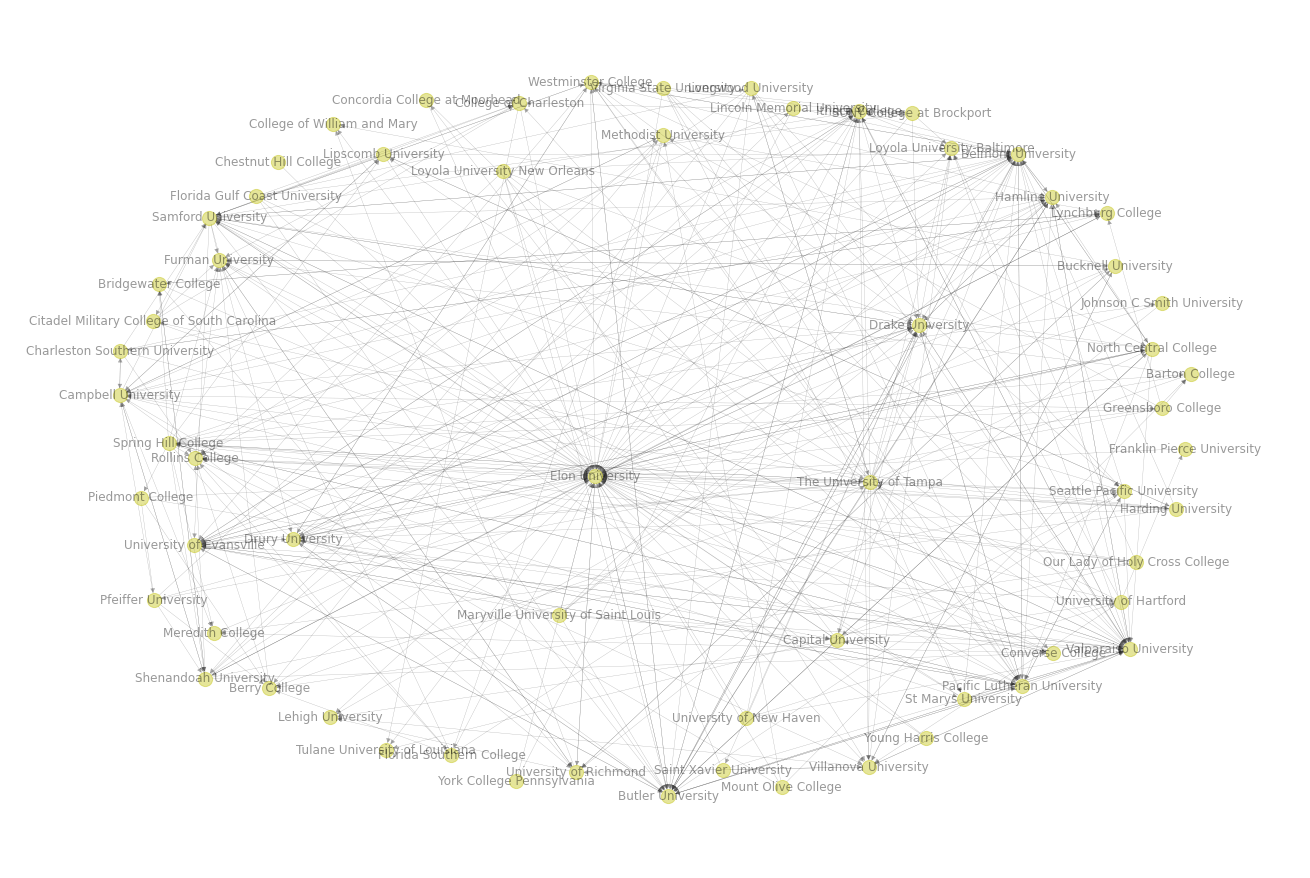

In [ ]:
# not sure how to make elon red
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(sub, k=2.5)
nx.draw(sub, pos=pos, node_size=200, 
        node_color = 'y',
        edge_color="#333333",
        alpha=0.4, 
        with_labels=True,
        width = 0.3)